In [28]:
import time
import matplotlib.pyplot as plt
from random import randrange
def timer(func):
    def inner(*args,**kwargs):
        t0 = time.time()
        func(*args,**kwargs)
        t1 = time.time()
        return t1-t0
    return inner

class TimePlotter(object):
    def __init__(self,funcs:list,DataSize=[1000000,10000000,100000000],RandomData = False,default = 0.001,scale='log'):
        self.data = []
        self.default = default
        self.time = []
        self.funcs = funcs
        self.DataSize = DataSize
        self.default = default
        self.scale = scale
        if RandomData:
            for i in DataSize:  
                self.data.append([randrange(1000000) for j in range(i)])
        else:
            for i in DataSize:  
                self.data.append(list(range(i)))
    def execute(self):
        for f in self.funcs:
            t = []
            for data in self.data:
                t1 = f(data)
                if t1 == 0:
                    t1 =self.default
                t.append(t1)
            self.time.append(t)
        #print(self.time)
    def plot(self):
        self.execute()
        for t in range(len(self.time)):
            plt.plot(self.DataSize,self.time[t],label='f{}'.format(t+1))
        plt.legend()
        plt.xscale(self.scale)
        plt.yscale(self.scale)

# Python algorithms
## Chapter 4 Induction and Recursion and Reduction
+ Reduction means transforming one problem to another. We normally reduce an unknown problem to one we know how to solve. The reduction may involve transforming both the input and the output
+ Induction, or mathematical induction, is used to show that a statement is true for a large class of objects. We do this by first showing it to be true for a base case  and then showing that it “carries over” from one object to the next; for example, if it’s true for $n–1$, then it’s true for $n$
+ Recursion is what happens when a function calls itself. Here we need to make sure the function works correctly for a base case and that it combines results from the recursive calls into a valid solution.
### Oh, That’s Easy!

Find the two (nonidentical) numbers that are closest to each other (that is, the two with the smallest absolute difference)

108742 108808
906367 906366
250281 250280
108742 108808
676817 676818
10838 10839


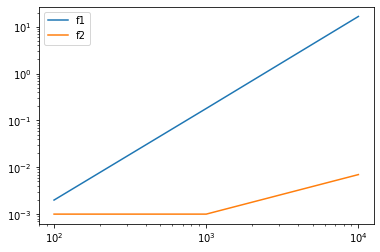

In [11]:
@timer
def f1(seq):
    dmax = float('inf')# Brute force, o(n^2)
    for x in seq:
        for y in seq:
            if x == y :
                continue
            diff = abs(x-y)
            if diff < dmax:
                x1 = x
                y1 = y
                dmax  = diff
    print(x1,y1)
@timer  # Sorting before check, O(n lg n)
def f2(seq):
    seq.sort()
    dmax = float('inf')
    for i in range(len(seq)-1):
        if seq[i] == seq[i+     1]:
            continue
        diff = abs(seq[i]-seq[i+1])
        if diff < dmax:
                x1 = seq[i]
                y1 = seq[i+1]
                dmax  = diff
    print(x1,y1)
TimePlotter([f1,f2],DataSize=[100,1000,10000],RandomData=True).plot()


### One, Two, Many
![](../images/python%20algorithm/3.jpg)

In [31]:
def cover(board,lab=1,top=0,left=0,side=None):
    if side == None:
        side = len(board)

    s = side //2 # subboard size, for next recursion
    # coordinates of corners of the big board, in (y,x), relative to the big board
    corners = [(0,0),(0,side-1),(side-1,0),(side-1,side-1)]
    # coordinates of subboard, at the opposite corner of the big corner 
    SubCorners = [(s-1,s-1),(s-1,s),(s,s-1),(s,s)]
    for i in range(4):
        # If the big board corner is not assigned
        if not board[top+corners[i][0]][left+corners[i][1]]: 
            board[top+SubCorners[i][0]][left+SubCorners[i][1]] = lab # mark the subboard corner
    lab += 1
    if s > 1: # s min = 2
        origins = [(0,0),(s,0),(0,s),(s,s)] # Coordinates of origin points
        for (y,x) in origins:
            lab = cover(board,lab,top+y,left+x,s)
    return lab
board = [[0]*8 for i in range(8)]
board[7][0] = -1 # missing corner
cover(board)
for row in board:
    print((" %2i"*8) % tuple(row))

  3  3  5  5 13 13 15 15
  3  2  2  5 13 12 12 15
  4  2  6  6 14 14 12 16
  4  4  6  1  1 14 16 16
  8  8 10 10  1 18 20 20
  8  7  7 10 18 18 17 20
  9  9  7 11 19 17 17 21
 -1  9 11 11 19 19 21 21


### Mirror, Mirror

In [60]:
seq = [randrange(1000) for i in range(30)]

In [44]:
# Recrusion innsertion sort
def ReInsertSort(seq,i):
    if i == 0 : # base case
        return seq
    l = ReInsertSort(seq,i-1)
    j = i-1
    while j >=0:
        if l[j] > l[j+1]:
            l[j],l[j+1] = l[j+1],l[j]
        j -= 1
    return l
print(ReInsertSort(seq,len(seq)-1))

[18, 44, 67, 152, 155, 176, 234, 295, 303, 351, 388, 502, 555, 601, 604, 638, 680, 697, 730, 735, 767, 790, 812, 880, 909, 933, 941, 946, 952, 985]


In [50]:
# Insertion sort, no recursion
def InsertSort(seq):
    for i in range(len(seq)):
        j = i-1
        while j >=0:
            if seq[j] > seq[j+1]:
                seq[j],seq[j+1] = seq[j+1],seq[j]
            j -= 1
    return seq 
print(InsertSort(seq))

[49, 54, 73, 102, 159, 167, 198, 218, 223, 315, 325, 450, 559, 563, 587, 629, 641, 641, 687, 754, 784, 804, 888, 895, 898, 918, 920, 947, 956, 960]


In [59]:
# Selection sort with recursion
def ReSelSort(seq,i):
    if i == 0:
        return seq
    Maxi = i
    for j in range(i):
        if seq[j] >seq[Maxi] :
            Maxi = j
    seq[i],seq[Maxi] = seq[Maxi],seq[i]
    seq = ReSelSort(seq,i-1)
    return seq
print(ReSelSort(seq,len(seq)-1))

[94, 104, 112, 142, 165, 168, 178, 321, 380, 445, 455, 487, 516, 596, 603, 611, 616, 633, 639, 651, 768, 816, 871, 886, 901, 913, 964, 995, 997, 998]


In [62]:
# Selection sort without recursion
def SelSort(seq):
    for i in range(len(seq)-1,-1,-1):
        Maxi = i
        for j in range(i):
            if seq[j] >seq[Maxi] :
                Maxi = j
        seq[i],seq[Maxi] = seq[Maxi],seq[i]
    return seq
print(SelSort(seq))

[28, 40, 52, 60, 79, 81, 179, 258, 259, 366, 373, 397, 440, 456, 507, 507, 542, 549, 583, 591, 658, 664, 766, 773, 878, 903, 928, 963, 974, 993]


### Designing with Induction (and Recursion)
#### Finding a Maximum Permutation
Eight persons with very particular tastes have bought tickets to the movies. Some of them are happy with their seats, but most of them are not. Let’s say each of them has a favorite seat, and you want to find a way to let them switch seats to make as many people as possible happy with the result. However, all of them refuse to move to another seat if they can’t get their favorite.  
This is a form of matching problem. We can model the problem  as a graph. The edges point from where people are currently sitting to where they want to sit
![](../images/python%20algorithm/4.jpg)

In [68]:
M = [2,2,0,5,3,5,7,4]
# Our target is to remove the elements that are not pointed to

In [78]:
def ReMaxPerm(M,A = None):
    if A == None:
        A = set(range(len(M)))
    if len(A) == 1:
        return A
    B = set(M[i] for i in A) # pointed to
    C = A - B # not pointed to
    if C:
        A.remove(C.pop())
        return ReMaxPerm(M,A)   # Removing one will cause new empty element
    return A
print(ReMaxPerm(M))

{0, 2, 5}


In [75]:
# iterative, linear time
def MaxPerm(M):
    n = len(M)
    A = set(range(n))
    count = [0 for i in range(n)] 
    for i in M:
        count[i] += 1
    Q = [i for i in range(n) if count[i] ==0] #counting
    while Q:
        a = Q.pop()
        A.remove(a)
        count[M[a]] -= 1  # reduce edge number
        if count[M[a]] == 0: #check for new empty ones
            Q.append(M[a])
    return A
MaxPerm(M) 

{0, 2, 5}

#### The Celebrity Problem
In the celebrity problem, you’re looking for a celebrity in a crowd. The idea is as follows: The celebrity knows no one, but everyone knows the celebrity.

In [122]:
G = [[randrange(2) for i in range(100)] for i in range(100)]
c = 99
for i in range(100):
    G[i][c] = 1
    G[c][i] = 0
c

99

In [123]:
def BruteCele(G): # Brute force
    for i in range(len(G)):
        for j in range(len(G)):
            if i == j:
                continue
            if G[i][j]:
                break
            if not G[j][i]:
                break
        else:
            return i
    return 'No'
BruteCele(G)

99

In [124]:
def cele(G): # linear time
    n = len(G)
    i,j = 0,1
    for c in range(2,n+1):
        if G[i][j]: # then i is not celebrity,j becomes candidate
            i = j
            j = c 
        else:  # then j is not celebrity, i is still candidate
            j = c 
    for c in range(n): # check if i is celebrity
        if G[c][i]:
            continue
        if c == i:
            continue
        if not G[c][i]:
            return 'No'
    return i
cele(G)

99

#### Topological Sorting
In almost any project, the tasks to be undertaken will have dependencies that partially restrict their ordering. Such dependencies are easily represented as a directed acyclic graph (DAG), and finding an ordering that respect the dependencies is called topological sorting.  
![](../images/python%20algorithm/5.jpg)

In [54]:
M = {
    'e':['f'],
    'a':['b','f'],
    'b':['c','f','d'],
    'd':['e','f'],
    'c':['d'],
    'f':[]}

In [55]:
def ReTopSort(G,S=None): # brute force recrusion, O(n^2), incorrect
    if S == None:
        S= set(G)
    if len(S) == 1:
        return list(S) #base case
    n = S.pop() #pop a node
    seq = ReTopSort(G,S)
    mini = 0
    for i,node in enumerate(seq):
        if n in G[node]: # check for dependency
            mini = i+1
    seq.insert(mini,n)
    return seq
print(ReTopSort(M))


['c', 'a', 'b', 'd', 'e', 'f']


In [85]:
def topsort(G):  # removing the correct node, linear time
    count = dict((n,0) for n in G)
    for n in G:
        for v in G[n]:
            count[v] += 1
    Q = [n for n in G if count[n] ==0]
    S = []
    while Q:
        a = Q.pop() # remove 0 in-degree
        S.append(a)
        for n in G[a]:
            count[n] -= 1 # update count
            if count[n] == 0:
                Q.append(n)
    return S
topsort(M)

['a', 'b', 'c', 'd', 'e', 'f']

### Stronger Assumptions
+ A balance factor is defined for each internal node and is set to the difference between the heights of the left and right subtrees, where height is the greatest distance from the node (downward) to a leaf
### Invariants and Correctness
+ A loop invariant is something that is true after each iteration of a loop, given some preconditions; it’s called an invariant because it doesn’t vary
### Relaxation and Gradual Improvement
+ The term has been picked up by algorists and is used to describe the crucial step in several algorithms, particularly shortest-path algorithms based on dynamic programming, where we gradually improve our approximations to the optimum
### Reduction + Contraposition = Hardness Proof
+ The hardness proofs are based on the fact that we only allow easy (that is, fast) reductions. Let’s say you’re able to reduce problem A to B . We then know that if B is easy, A must be easy as well. That follows directly from the fact that we can use B, along with an easy reduction, to solve A.
+ If you can reduce A to B, then B is at least as hard as A.
+ If you want to show that X is hard and you know that Y is hard, reduce Y to X
### Problem Solving Advice
### Exercise
1. A graph that you can draw in the plane without any edges crossing each other is called planar. Such a drawing will have a number of regions, areas bounded by the edges of the graph, as well as the (infinitely large) area around the graph. If the graph has $V, E,$ and $F$ nodes, edges, and regions, respectively, Euler’s formula for connected planar graphs says that $V – E + F = 2$. Prove that this is correct using induction.
   For 2 nodes: $V – E + F = 2-2+2 = 2$  
   For $n$ nodes: $V – E + F = n-E+F = 2$  
   add 1 node: $n+1-(E+\Delta E)+(F+\Delta F), \Delta E -1 = \Delta F, n+1-(E+\Delta E)+(F+\Delta F)=2$
2. Consider a plate of chocolate, consisting of $n$ squares in a rectangular arrangement. You want to break it into individual squares, and the only operation you’ll use is breaking one of the current rectangles (there will be more, once you start breaking) into two pieces. What is the most efficient way of doing this?    
   Break the chocolate at $k$: one piece A of $k$, one piece B of $n-k$ squares  
   Hypothesis: Break any chocolate cost $n-1$ ops  
   break A: $k-1$, break B: $n-k-1$  
   Break the whole: $k-1+n-k-1+1=n-1$  
3. Let’s say you’re going to invite some people to a party. You’re considering $n$ friends, but you know that they will have a good time only if each of them knows at least $k$ others at the party. (Assume that if A knows B, then B automatically knows A.) Solve your problem by designing an algorithm for finding the largest possible subset of your friends where everyone knows at least $k$ of the others, if such a subset exists.  
Bonus question: If your friends know $d$ others in the group on average and at least one person knows at least one other, show that you can always find a (nonempty) solution for $k \le \dfrac{d}{2}$.
   bonus: edges/nodes $= \dfrac{d}{2} = \dfrac{\frac{2E}{N}}{2}$  
   delete the node, the ratio will not decrease, the result is nonempty

In [24]:
M = {
    'a':['b','c','d','e','f','g'],
    'b':['a','g'],
    'c':['a','d','f','g'],
    'd':['a','c','e','g'],
    'e':['a','d','f'],
    'f':['a','c','e'],
    'g':['a','c','d','b']}

In [34]:
def FindFir(G,k=3):
    count = dict((f,len(G[f])) for f in G) 
    Q = [i for i in G if count[i] < k] # people who know less than k is not in the solution
    S = list(G)
    while Q:
        LonelyF = Q.pop()
        S.remove(LonelyF)  
        for f in S:
            if LonelyF in G[f]:
                count[f] -= 1  # update count
                if count [f] <k:
                    Q.append(f)
    return S
print(FindFir(M))

['a', 'c', 'd', 'e', 'f', 'g']


4. A node is called central if the greatest (unweighted) distance from that node to any other in the same graph is minimum. That is, if you sort the nodes by their greatest distance to any other node, the central nodes will be at the beginning. Explain why an unrooted tree has either one or two central nodes, and describe an algorithm for finding them.  


In [6]:
T = {'a':['b','f'],
    'b':['a','c','d'],
    'c':['b'],
    'd':['b'],
    'f':['a','e'],
    'e':['f']}
T2 = {'a':['b'],
    'b':['a','c'],
    'c':['b','d'],
    'd':['c']}

In [9]:
def cen(T):
    if len(T) == 1 or len(T) == 2:
        return list(T) #the nodes are all central
    count = dict((n,len(T[n])) for n in T)
    leaves = [n for n in T if count[n] ==1 ] #leaf can never be central
    C = list(T)
    T= dict((n,T[n]) for n in T if not n in leaves)
    while leaves:
        leaf = leaves.pop()
        for n in T:
            if leaf in T[n]:
                T[n].remove(leaf)
    return cen(T)
cen(T2)

['b', 'c']

5. Remember the knights in Chapter 3? After their first tournament, which was a round-robin 
tournament, where each knight jousted one of the other, the staff want to create a ranking. They realize it might not be possible to create a unique ranking or even a proper topological sorting (because there may be cycles of knights defeating each other), but they have decided on the following solution: order the knights in a sequence $K_1, K_2, ... , K_n,$ where $K_1$ defeated $K_2$, $K_2$ defeated $K_3$, and so forth ($K_{i–1}$ defeated $K_i$, for $i=2...n$). Prove that it is always possible to construct such a sequence by designing an algorithm that builds it.

In [26]:
K = [
    [-1,1 ,1 ,1  ,1],
    [0 ,-1,0 ,1  ,0],
    [0 ,1 ,-1, 0 ,1],
    [0 ,0 ,1 ,-1 ,1],
    [0 ,1 ,0,0  ,-1]
]

In [27]:
def tour(K,i):
    if i == 1: # base case
        return [K[0]]
    s = tour(K[-(i-1):],i-1)
    for j in range(len(s)):
        win = K[0][s[j].index(-1)] #find the right place
        if win == 1:
            s.insert(j,K[0])
            return s
    s.append(K[0])
    return s
for i in tour(K,5):
    print('K{},'.format(i.index(-1)+1),end='')

K1,K2,K4,K3,K5,

6. George Pólya (the author of How to Solve It; see the “References” section) came up with the following entertaining (and intentionally fallacious) “proof” that all horses have the same color. If you have only a single horse, then there’s clearly only one color (the base case). Now we want to prove that $n$ horses have the same color, under the inductive hypothesis that all sets of $n–1$ horses do. Consider the sets ${1, 2, ... , n–1}$ and ${2, 3, ... , n}$. These are both of size $n–1$, so in each set, there is only one color. However, because the sets overlap, the same must be true for ${1, 2, ... n}$. Where’s the error in this argument?  \
   The hypothesis is invalid, for $n=2$
7. In the example early in the section “One, Two, Many,” where we wanted to show how many 
internal nodes a binary tree with $n$ leaves had, instead of “building up” from $n–1$ to $n$, we started with $n$ nodes and deleted one leaf and one internal node. Why was that OK?  
    It holds for any tree.
8. Use the standard rules from Chapter 2 and the recurrences from Chapter 3 and show that the 
running times of the four sorting algorithms in Listings 4-1 through 4-4 are all quadratic.   
   Recursive insertion: $T(n)=T(n-1)+n, O(n^2)$   
   non recursive: two loops, $O(n^2)$  
   Similarly, selection sort is $O(n^2)$ 
9. In finding a maximum permutation recursively (such as in Listing 4-5), how can we be sure that the permutation we end up with contains at least one person? Shouldn’t it be possible, in theory, to remove everyone?   
    The base case is specified.   
10. Show that the naïve algorithm for finding the maximum permutation (Listing 4-5) is quadratic.  
    $T(n)=T(n-1)+n, O(n^2)$
11. Implement radix sort.

In [47]:
l =[randrange(1000,9999) for i in range(50)]

In [48]:
def RadSort(seq,leng = 4):
    for i in range(leng):
        res = []
        for d in range(10):
            for n in seq:
                if int(str(n)[-(i+1)]) == d:
                    res.append(n)
        seq = res
    return res
print(RadSort(l))


[1001, 1027, 1250, 1485, 1631, 1920, 2062, 2140, 2157, 2611, 2976, 2978, 3072, 3436, 3510, 3593, 3798, 3973, 3978, 4007, 4208, 4273, 4320, 4457, 4557, 4836, 4851, 4883, 4949, 4964, 5056, 5093, 5570, 5791, 5837, 6019, 6022, 6483, 7181, 7261, 7349, 8270, 8659, 8735, 8919, 9130, 9516, 9583, 9794, 9975]


12. Implement bucket sort.


In [50]:
def BuckSort(seq,start = 1000,end =10000,inter=1000):
    res = []
    buckets = [[i,i+inter-1] for i in range(start,end,inter)]
    for n in seq:
        for b in buckets:
            if b[0] <= n <= b[1]:
                b.append(n)
                break
    for b in buckets:
        b.sort()
        for n in b[1:-1]:
            res.append(n)
    return res
print(BuckSort(l))

[1001, 1027, 1250, 1485, 1631, 1920, 2062, 2140, 2157, 2611, 2976, 2978, 3072, 3436, 3510, 3593, 3798, 3973, 3978, 4007, 4208, 4273, 4320, 4457, 4557, 4836, 4851, 4883, 4949, 4964, 5056, 5093, 5570, 5791, 5837, 6019, 6022, 6483, 7181, 7261, 7349, 8270, 8659, 8735, 8919, 9130, 9516, 9583, 9794, 9975]


13. For numbers (or strings or sequences) with a fixed number of digits (or characters or elements), $d$, radix sort has a running time of $\Theta(dn)$. Let’s say you are sorting number whose digit counts vary greatly. A standard radix sort would require you to set $d$ to the maximum of these, padding the rest with initial zeros. If, for example, a single number had a lot more digits than all the others, this wouldn’t be very efficient. How could you modify the algorithm to have a running time of $\Theta(\sum d_i)$, where $d_i$ is the digit count of the  $i$ th number?  
    Sort the numbers by digit number, then radix sort on each digit number

14. How could you sort $n$ numbers in the value range $1...n^2$ in $\Theta(n)$ time?    
    Represent the number in another number system. Two digits, each in range $[0,n)$  
15. When finding in-degrees in the maximum permutation problem, why could the count array 
simply be set to `[M.count(i) for i in range(n)]`?   
    list comprehension is quadric
16. The section “Designing with Induction (and Recursion)” describes solutions to three problems. Compare the naïve and final versions of the algorithms experimentally.
17. Explain why `naive_topsort` is correct; why is it correct to insert the last node directly after its dependencies?  
    It is incorrect. The dependencies are not fully checked.  
18. Write a function for generating random DAGs. Write an automatic test that checks that `topsort`gives a valid orderings, using your DAG generator.


In [95]:
import random
def gen():
    source = ['a','b','c','d','e','f','g','h']
    random.shuffle(source)  
    dag = dict((n,[]) for n in source)
    for i in range(7):
        for j in range(i+1,8):
            edge = randrange(2) 
            if edge:  
                dag[source[i]].append(source[j])
    return dag
def test(func,dag= None):
    if dag == None:
        dag = gen()
    sortDAG = func(dag)
    print(dag)
    print(sortDAG)
    for n in sortDAG[1:]:
        for s in dag:
            if n in dag[s]:
                if sortDAG.index(s) > sortDAG.index(n):
                    return 'Wrong'
    return 'Correct'
a = gen()
test(topsort,a)

{'e': ['h', 'f', 'c'], 'g': ['h', 'd', 'a', 'c'], 'h': ['f', 'a', 'c'], 'f': ['d', 'a'], 'd': [], 'b': ['c'], 'a': [], 'c': []}
['b', 'g', 'e', 'h', 'c', 'f', 'a', 'd']


'Correct'

19. Redesign `topsort` so it selects the last node in each iteration, rather than the first.

In [100]:
def topsort2(G):  # removing the correct node, linear time
    count = dict((n,len(G[n])) for n in G)
    Q = [n for n in G if count[n] ==0] # count for outward edge
    S = []
    while Q:
        a = Q.pop() # remove 0 out-degree
        S.insert(0,a)
        for n in G:
            if a in G[n]:
                count[n] -= 1 # update count
                if count[n] == 0:
                    Q.append(n)
    return S           
test(topsort2,a) 

{'e': ['h', 'f', 'c'], 'g': ['h', 'd', 'a', 'c'], 'h': ['f', 'a', 'c'], 'f': ['d', 'a'], 'd': [], 'b': ['c'], 'a': [], 'c': []}
['e', 'g', 'h', 'f', 'd', 'a', 'b', 'c']


'Correct'

20. Implement the algorithm for finding balance factors in a binary tree.  
    ![](../images/python%20algorithm/6.jpg)


In [159]:
class Tree(object): # binary tree
    def __init__(self,left,right):
        self.left=left
        self.right = right
T = Tree(
        Tree('a',
            Tree(
                Tree('b','c'),
                'd')),
        Tree(
            Tree(
                Tree('e','f'),
                Tree('g','h')),
            Tree('i',
                Tree('j','k'))))

In [180]:
def CountNode(T):
    if type(T) is str:
        return 0
    if type(T.left) is str:
        lnode = 0
    elif type(T.left) is Tree:
        lnode = 1 + max(CountNode(T.left)[0],CountNode(T.left)[1])
    if type(T.right) is str:
        rnode = 0
    elif type(T.right) is Tree:
        rnode = 1 + max(CountNode(T.right)[0],CountNode(T.right)[1])
    return [lnode,rnode]
def BalFac(T):
    return CountNode(T)[0] - CountNode(T)[1]
BalFac(T.left.right.left)

0

21. An interval can be represented, for example, as a pair of numbers, such as $(3.2, 4.9)$. Let’s say you have a list of such intervals (where no intervals are identical), and you want know which intervals that fall inside other intervals. An interval $(u,v)$ falls inside $(x,y)$ when $x \le u$ and $v \le y$. How would you do this efficiently?  


In [134]:
s = [randrange(0,999) for i in range(10)]
intervals = [(randrange(1,a),randrange(a,1000)) for a in s]

In [135]:
def FindIn(l,seq=None,s = False):
    if not s:
        l.sort(key = lambda x:x[0])
        s = True
    if len(l) == 1:
        return ['F']
    seq = FindIn(l[:-1],seq,s)
    MaxRight = l[0][1]
    for i in l[:-1]:
        if i[1] > MaxRight:
            MaxRight = i[1]
    if l[-1][1] < MaxRight:
        seq.append('T')
    else:
        seq.append('F')
    return seq
FindIn(intervals)

['F', 'F', 'F', 'T', 'T', 'T', 'T', 'F', 'T', 'F']

22. How would you improve the relaxation-based algorithm for the airplane + train problem in the section “Relaxation and Gradual Improvement” so that you are guaranteed an answer in polynomial time?  

In [125]:
A = [randrange(100) for i in range(5)]
B = [[randrange(100) for i in range(5)] for j in range(5)]
A,B

([35, 64, 99, 15, 66],
 [[15, 39, 39, 11, 18],
  [25, 62, 53, 13, 14],
  [67, 99, 1, 94, 11],
  [98, 88, 64, 19, 69],
  [5, 95, 49, 28, 70]])

In [126]:
def FindT(A,B):
    t = []
    for i in range(len(A)):
        for j in range(len(B)):
            t1 = A[i] + B[i][j]
            t.append(t1)
    return min(t)
FindT(A,B)

34

23. Consider three problems, foo, bar, and baz. You know that bar is hard and that baz is easy. How would you go about showing that foo was hard? How would you show that it was easy?   
    reduce bar to foo  
    reduce foo to baz